In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8]], dtype = torch.float)
y_data = torch.tensor([[0],[0],[0],[0],[1],[1],[1],[1]], dtype = torch.float)

In [3]:
import torch.nn.functional as F

In [4]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.linear = torch.nn.Linear(1,1)
        #self.sigmoid = torch.nn.Sigmoid() #another way to use sigmoid
    def forward(self,x):
        l1 = self.linear(x)
        #o1 = self.sigmoid(l1) #another way to use sigmoid
        return F.sigmoid(l1)

In [5]:
model = LogisticRegression()

In [6]:
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.01)

In [7]:
criterion = torch.nn.BCELoss()

In [8]:
epoch_list = []
loss_list = []
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    loss.backward()
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

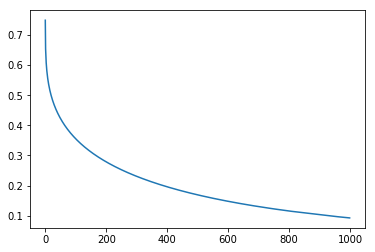

In [9]:
plt.plot(epoch_list,loss_list)

In [10]:
model(torch.tensor([[5]], dtype = torch.float)) >0.5

tensor([[ 1]], dtype=torch.uint8)